In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Read In Data

In [19]:
df_BA=pd.read_csv('BA')
df_DS=pd.read_csv('DS')
df_DA=pd.read_csv('DA')
df_DE=pd.read_csv('DE')

In [20]:
df_BA

,JT,JD,tool_list,skill_list,degree_list,clean,lda_list,newlist
0,BA,You will:\nSupport agile team in translating e...,['excel'],"['research', 'account', 'end user', 'analyz', ...",1.0,"['excel', 'research', 'account', 'end user', '...","['medic', 'program', 'assist']","['excel', 'research', 'account', 'end user', '..."
1,BA,If you enjoy working in a highly collaborative...,"['salesforc', 'excel']","['account', 'econom', 'visual', 'financ', 'bus...",1.0,"['salesforc', 'excel', 'account', 'econom', 'v...",['integr'],"['salesforc', 'excel', 'account', 'econom', 'v..."
2,BA,Excellence Delivered As Promised.\nIt’s more t...,['excel'],"['research', 'statist', 'recommend', 'kpi', 'e...",1.0,"['excel', 'research', 'statist', 'recommend', ...","['challeng', 'parti', 'concis', 'engin', 'prog...","['excel', 'research', 'statist', 'recommend', ..."
3,BA,This global practice supports clients in many ...,[None],"['research', 'statist', 'recommend', 'econom',...",1.0,"['research', 'statist', 'recommend', 'econom',...","['challeng', 'assist', 'quantit', 'physic', 'c...","['research', 'statist', 'recommend', 'econom',..."
4,BA,Business Analysts roles are targeted at gradua...,"['excel', 'powerpoint']","['recommend', 'econom', 'commun', 'problem sol...",1.0,"['excel', 'powerpoint', 'recommend', 'econom',...",['engin'],"['excel', 'powerpoint', 'recommend', 'econom',..."
...,...,...,...,...,...,...,...,...
1658,BA,Junior Business Analyst\nAs the Business Analy...,[None],"['busi', 'analyz']",999.0,"['busi', 'analyz']",[None],"['busi', 'analyz', None]"
1659,BA,The Business Senior Analyst is an intermediate...,"['sa', 'excel']","['account', 'commun', 'problem solving', 'busi...",1.0,"['sa', 'excel', 'account', 'commun', 'problem ...","['program', 'challeng', 'techniqu', 'concis']","['sa', 'excel', 'account', 'commun', 'problem ..."
1660,BA,Back to job search\nBusiness Analyst - Loan IQ...,['excel'],"['account', 'commun', 'financ', 'risk', 'busi']",999.0,"['excel', 'account', 'commun', 'financ', 'risk...","['challeng', 'corpor', 'asset']","['excel', 'account', 'commun', 'financ', 'risk..."
1661,BA,Junior Business Analyst\nAs the Business Analy...,[None],"['busi', 'analyz']",999.0,"['busi', 'analyz']",[None],"['busi', 'analyz', None]"


# Sample and Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
len(df_DS),len(df_DA),len(df_BA),len(df_DE)

(973, 3983, 1663, 1167)

In [23]:
df_DA=df_DA.sample(n=1000)
df_BA=df_BA.sample(n=1000)

In [24]:
len(df_DS),len(df_DA),len(df_BA),len(df_DE)

(973, 1000, 1000, 1167)

In [25]:
whole_list=[df_DA,df_DS,df_DE,df_BA]
df_whole=pd.concat(whole_list)

In [26]:
df_whole

,JT,JD,tool_list,skill_list,degree_list,clean,lda_list,newlist
2196,DA,Overview Job Responsibilities Buildmaintain ne...,"['excel', 'vba', 'microsoft', 'ms office', 'po...","['visual', 'graph', 'data']",1.0,"['excel', 'vba', 'microsoft', 'powerpoint', 'v...","['clearanc', 'parti', 'secret']","['excel', 'vba', 'microsoft', 'powerpoint', 'v..."
7,DA,The Data Analyst is an integral member of the ...,"['sql', 'r', 'scala', 'cloud', 'python', 'goog...","['statist', 'dashboard', 'recommend', 'optim',...",1.0,"['sql', 'r', 'scala', 'cloud', 'python', 'goog...","['quantit', 'python', 'integr', 'techniqu', 'b...","['sql', 'r', 'scala', 'cloud', 'python', 'goog..."
2862,DA,About This Role\nWhat You'll Do\nDevelop and m...,['excel'],"['kpi', 'busi', 'data', 'financ']",1.0,"['excel', 'kpi', 'busi', 'data', 'financ']","['engin', 'quantit']","['excel', 'kpi', 'busi', 'data', 'financ', 'en..."
258,DA,Overview\nThe Data Analyst is a part of the Ri...,"['excel', 'sql']","['research', 'information technology', 'etl', ...",1.0,"['excel', 'sql', 'research', 'information tech...","['etl', 'mortgag', 'govern', 'integr', 'credit...","['excel', 'sql', 'research', 'information tech..."
3049,DA,"Interpret data, analyze results using statisti...","['sa', 'sql', 'spss', 'excel', 'javascript']","['etl', 'data', 'analyz', 'busi', 'statist']",2.0,"['sa', 'sql', 'spss', 'excel', 'javascript', '...","['engin', 'techniqu', 'statist', 'etl']","['sa', 'sql', 'spss', 'excel', 'javascript', '..."
...,...,...,...,...,...,...,...,...
381,BA,PRACTICE OVERVIEW\nPOSITION SUMMARY\nIn additi...,"['sql', 'excel', 'microsoft', 'powerpoint', 't...","['research', 'account', 'optim', 'analyz', 'co...",1.0,"['sql', 'excel', 'microsoft', 'powerpoint', 't...",['challeng'],"['sql', 'excel', 'microsoft', 'powerpoint', 't..."
1150,BA,Job Title: Senior Business Analyst\nJob Type: ...,"['jira', 'excel', 'ms office']","['healthcar', 'busi', 'data', 'commun']",1.0,"['jira', 'excel', 'microsoft', 'healthcar', 'b...","['integr', 'distribut']","['jira', 'excel', 'microsoft', 'healthcar', 'b..."
372,BA,A Fortune 500 client is looking for a Junior B...,"['tableau', 'excel', 'microsoft', 'sql']","['problem solving', 'information technology', ...",2.0,"['tableau', 'excel', 'microsoft', 'sql', 'prob...",[None],"['tableau', 'excel', 'microsoft', 'sql', 'prob..."
113,BA,is:\nBusiness\nAnalyst with a strong experienc...,[None],"['busi', 'data', 'healthcar']",999.0,"['busi', 'data', 'healthcar']",['medic'],"['busi', 'data', 'healthcar', 'medic']"


# Models

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [28]:
def evaluate_model(df,best,rf=False):
    df_train, df_test = train_test_split(df, test_size = 0.3)
    clean_train=df_train["newlist"]
    Y_train=df_train["JT"]
    clean_test=df_test["newlist"]
    Y_test=df_test["JT"]

    vectorizer = CountVectorizer().fit(df["newlist"])
    clean_bow= vectorizer.transform(df["newlist"])
    train_bow = vectorizer.transform(clean_train)
    test_bow = vectorizer.transform(clean_test)
    parameter=vectorizer.get_feature_names()
    
    tfidf_transformer = TfidfTransformer().fit(clean_bow)
    X_train = tfidf_transformer.transform(train_bow)
    X_test = tfidf_transformer.transform(test_bow)
    
    best.fit(X_train, Y_train)
    predictions1 = best.predict(X_test)
    print(classification_report(Y_test,predictions1))
    if rf:
        importances =best.feature_importances_
        forest_importances = pd.Series(importances,index=parameter)
        forest_importances=forest_importances.sort_values(ascending=False)[0:10]
        ax=forest_importances.plot.barh(x='lab', y='val')
        ax.invert_yaxis()
    

In [29]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [30]:
def encoding(name):
    df = pd.DataFrame()
    whole_list=[df_DA,df_DS,df_DE,df_BA]
    for i in whole_list:
        name1=get_df_name(i)
        if name1.split("_")[1]!=name:
            i_copy=i.sample(n=340)
        else:
            i_copy=i.copy()
        df=pd.concat([df,i_copy],ignore_index=True)
    df["NEWJT"]= np.where(df["JT"]==name,"1","0")

    df["JT"]=df["NEWJT"]
    return df

In [31]:
BA_model = encoding('BA')

In [32]:
BA_model

,JT,JD,tool_list,skill_list,degree_list,clean,lda_list,newlist,NEWJT
0,0,Job ID 1188713\nCategory Data Analytics\nSched...,"['sa', 'sql', 'hadoop', 'r', 'python', 'excel'...","['data mining', 'statist', 'dashboard', 'recom...",1.0,"['sa', 'sql', 'hadoop', 'r', 'python', 'excel'...","['feedback', 'clinic', 'govern', 'public', 'in...","['sa', 'sql', 'hadoop', 'r', 'python', 'excel'...",0
1,0,", , ,\n",[None],[None],999.0,[],[None],[None],0
2,0,JOB TITLE:Data Analyst/Accounting Specialist\n...,"['excel', 'microsoft']","['account', 'analyz', 'supervis', 'commun', 'f...",1.0,"['excel', 'microsoft', 'account', 'analyz', 's...","['assist', 'govern', 'medic', 'credit', 'clear...","['excel', 'microsoft', 'account', 'analyz', 's...",0
3,0,Position: Master Data Analyst\nDuration – 8-12...,"['ms office', 'r']","['account', 'busi', 'data', 'financ']",2.0,"['microsoft', 'r', 'account', 'busi', 'data', ...",[None],"['microsoft', 'r', 'account', 'busi', 'data', ...",0
4,0,Full Part/Time: Full time\nJob Req: G2019-6303...,[None],"['data', 'analyz', 'recommend']",1.0,"['data', 'analyz', 'recommend']","['govern', 'secret', 'public', 'integr', 'dod'...","['data', 'analyz', 'recommend', 'govern', 'sec...",0
...,...,...,...,...,...,...,...,...,...
2015,1,PRACTICE OVERVIEW\nPOSITION SUMMARY\nIn additi...,"['sql', 'excel', 'microsoft', 'powerpoint', 't...","['research', 'account', 'optim', 'analyz', 'co...",1.0,"['sql', 'excel', 'microsoft', 'powerpoint', 't...",['challeng'],"['sql', 'excel', 'microsoft', 'powerpoint', 't...",1
2016,1,Job Title: Senior Business Analyst\nJob Type: ...,"['jira', 'excel', 'ms office']","['healthcar', 'busi', 'data', 'commun']",1.0,"['jira', 'excel', 'microsoft', 'healthcar', 'b...","['integr', 'distribut']","['jira', 'excel', 'microsoft', 'healthcar', 'b...",1
2017,1,A Fortune 500 client is looking for a Junior B...,"['tableau', 'excel', 'microsoft', 'sql']","['problem solving', 'information technology', ...",2.0,"['tableau', 'excel', 'microsoft', 'sql', 'prob...",[None],"['tableau', 'excel', 'microsoft', 'sql', 'prob...",1
2018,1,is:\nBusiness\nAnalyst with a strong experienc...,[None],"['busi', 'data', 'healthcar']",999.0,"['busi', 'data', 'healthcar']",['medic'],"['busi', 'data', 'healthcar', 'medic']",1


In [33]:
BA_model['JT'].describe()

count     2020
unique       2
top          0
freq      1020
Name: JT, dtype: object

## Decision Tree

              precision    recall  f1-score   support

          BA       0.73      0.72      0.73       314
          DA       0.60      0.57      0.58       306
          DE       0.75      0.77      0.76       326
          DS       0.79      0.80      0.79       296

    accuracy                           0.72      1242
   macro avg       0.71      0.72      0.72      1242
weighted avg       0.71      0.72      0.72      1242



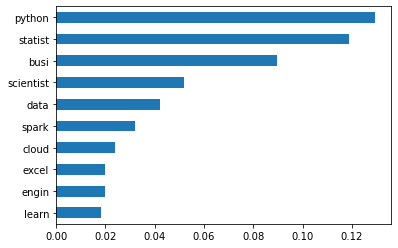

In [34]:
dtree = DecisionTreeClassifier()
evaluate_model(df_whole,dtree,rf=True)

## Random Forest

              precision    recall  f1-score   support

          BA       0.77      0.85      0.81       308
          DA       0.71      0.66      0.69       310
          DE       0.83      0.86      0.85       354
          DS       0.85      0.78      0.81       270

    accuracy                           0.79      1242
   macro avg       0.79      0.79      0.79      1242
weighted avg       0.79      0.79      0.79      1242



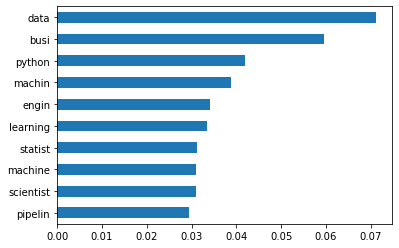

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
evaluate_model(df_whole,rf,rf=True)

In [36]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#      'n_estimators':(10, 50,100,150,200), #the number of trees
#      'max_depth':(5,10,20,30,50,80),
#      'min_samples_split': (2, 4, 8),
#      'min_samples_leaf': (4,8,12,16)
# }

# model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
# model.fit(X_train, Y_train)
# model.best_score_, model.best_params_

In [37]:
b_model = RandomForestClassifier(max_depth=20,min_samples_leaf=4,min_samples_split=8,n_estimators=200)

              precision    recall  f1-score   support

          BA       0.76      0.85      0.80       293
          DA       0.70      0.64      0.67       304
          DE       0.85      0.84      0.84       354
          DS       0.85      0.82      0.84       291

    accuracy                           0.79      1242
   macro avg       0.79      0.79      0.79      1242
weighted avg       0.79      0.79      0.79      1242



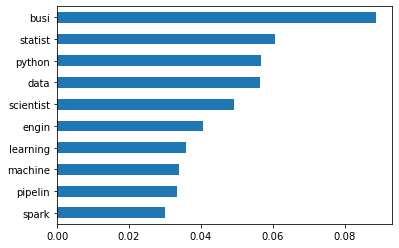

In [38]:
evaluate_model(df_whole,b_model,rf=True)

### Rf for each JT

In [39]:
BA_model = encoding('BA')
DE_model = encoding('DE')
DS_model = encoding('DS')
DA_model = encoding('DA')

In [40]:
rf = RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       302
           1       0.85      0.84      0.85       304

    accuracy                           0.85       606
   macro avg       0.85      0.85      0.85       606
weighted avg       0.85      0.85      0.85       606



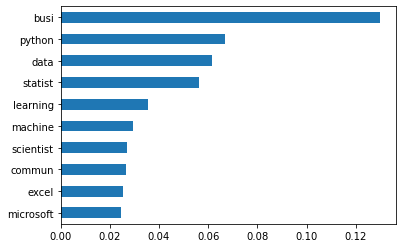

In [41]:
evaluate_model(BA_model,rf,rf=True)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       315
           1       0.81      0.78      0.79       291

    accuracy                           0.81       606
   macro avg       0.81      0.80      0.80       606
weighted avg       0.81      0.81      0.81       606



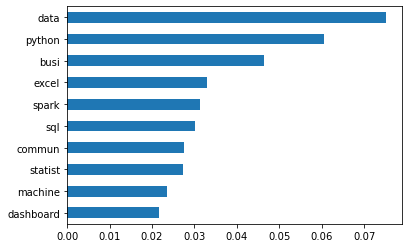

In [42]:
evaluate_model(DA_model,rf,rf=True)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       308
           1       0.88      0.88      0.88       290

    accuracy                           0.88       598
   macro avg       0.88      0.88      0.88       598
weighted avg       0.88      0.88      0.88       598



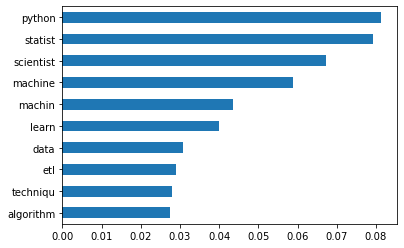

In [43]:
evaluate_model(DS_model,rf,rf=True)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       286
           1       0.90      0.87      0.88       371

    accuracy                           0.87       657
   macro avg       0.87      0.87      0.87       657
weighted avg       0.87      0.87      0.87       657



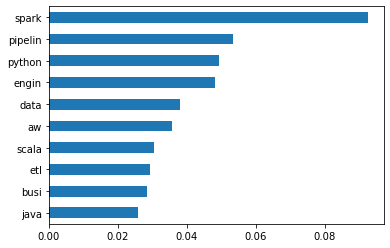

In [44]:
evaluate_model(DE_model,rf,rf=True)

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
# parameters = {
#      'n_estimators':(30, 50,80), #the number of trees
#      'max_samples':(20,40,60,80,100,120,150,200),
#      'max_features':(20,40,60,80,100,120,150,200),
     
# }

# model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
# model.fit(X_train, Y_train)
# model.best_score_, model.best_params_

In [ ]:
bg_model=BaggingClassifier(max_features=120,max_samples=200,n_estimators=80)
evaluate_model(df_whole,bg_model)

In [ ]:
bg=BaggingClassifier()

In [ ]:
evaluate_model(BA_model,bg)

In [ ]:
evaluate_model(DA_model,bg)